# Módulo 07 - Tarefa 02

#### 1) Carregue a base e garanta que a base está como deveria.

Considere a base que você ajustou na lição passada. Carregue-a. Caso ainda haja alguma pendência, ajuste - lembre-se de que o scikitlearn não recebe variáveis em formato string, somente numéricas, e não aceita '*missings*'. 

- Separe 70% da base para treinamento e 30% para validação. Cada uma dessas partes terá dois objetos, um armazenando a variável resposta ```mau```e outro armazenando as variáveis explicativas (lembrando: sem variáveis string, já com as dummies).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import plot_confusion_matrix, ConfusionMatrixDisplay, accuracy_score

%matplotlib inline

In [2]:
df = pd.read_csv('demo01_vidigal.csv')
print(df.info())
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6770 entries, 0 to 6769
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   sexo                   6770 non-null   object 
 1   posse_de_veiculo       6770 non-null   object 
 2   posse_de_imovel        6770 non-null   object 
 3   qtd_filhos             6770 non-null   int64  
 4   tipo_renda             6770 non-null   object 
 5   educacao               6770 non-null   object 
 6   estado_civil           6770 non-null   object 
 7   tipo_residencia        6770 non-null   object 
 8   idade                  6770 non-null   float64
 9   tempo_emprego          6770 non-null   float64
 10  possui_celular         6770 non-null   int64  
 11  possui_fone_comercial  6770 non-null   int64  
 12  possui_fone            6770 non-null   int64  
 13  possui_email           6770 non-null   int64  
 14  qt_pessoas_residencia  6770 non-null   float64
 15  mau 

,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,possui_celular,possui_fone_comercial,possui_fone,possui_email,qt_pessoas_residencia,mau
0,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,58.832877,3.106849,1,0,0,0,2.0,False
1,F,N,Y,0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,52.356164,8.358904,1,0,1,1,1.0,False
2,M,Y,Y,0,Working,Higher education,Married,House / apartment,46.224658,2.106849,1,1,1,1,2.0,False
3,F,Y,N,0,Working,Incomplete higher,Married,House / apartment,29.230137,3.021918,1,0,0,0,2.0,False
4,F,N,Y,0,Working,Secondary / secondary special,Married,House / apartment,27.482192,4.024658,1,0,1,0,2.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6765,F,N,Y,1,Working,Secondary / secondary special,Single / not married,House / apartment,34.857534,3.101370,1,1,1,0,1.0,True
6766,F,N,Y,0,Working,Secondary / secondary special,Civil marriage,House / apartment,54.109589,9.884932,1,0,0,0,2.0,True
6767,F,N,Y,0,Commercial associate,Secondary / secondary special,Married,House / apartment,43.389041,7.380822,1,1,1,0,2.0,True
6768,M,Y,Y,0,Working,Secondary / secondary special,Married,House / apartment,30.005479,9.800000,1,1,0,0,2.0,True


Comentário:

O RangeIndex indica que o DataFrame possui 6770 linhas numeradas de 0 a 6769.

A seção "Data columns" apresenta informações sobre as colunas do DataFrame. Temos 16 colunas no total, e cada uma delas é listada separadamente. Sendo cada uma acompanhada por informações como o nome da coluna, o número de valores não nulos (Non-Null Count) e o tipo de dado (Dtype).

As colunas do tipo bool armazenam valores booleanos (True ou False), as colunas float64 armazenam números de ponto flutuante, as colunas int64 armazenam valores inteiros e as colunas object armazenam valores de tipo genérico (como strings).

A seção "memory usage" indica o uso de memória pelo DataFrame, que é de aproximadamente 800.1 KB.

In [3]:
# Converter variáveis categóricas em variáveis dummy (one-hot encoding)
df_encoded = pd.get_dummies(df, drop_first=True)

In [4]:
# Separe 70% da base para treinamento e 30% para validação.
# Cada uma dessas partes terá dois objetos,
# um armazenando a variável resposta mau e outro armazenando as variáveis explicativas.

# X = Variáveis explicativas:
X = df_encoded.drop(columns='mau')
print('Quantidade de linhas e colunas das variáveis explicativas (X):', X.shape, '\n')

# y = Variável resposta:
y = df_encoded['mau']
print('Quantidade de linhas da variável resposta (y):', len(y), '\n\n')

# Separando a base em 70% para treinamento e 30% para validação:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

print('Quantidade de linhas e colunas de X_train (70%):', X_train.shape)
print('Quantidade de linhas e colunas de X_test (30%):', X_test.shape, '\n')
print('Quantidade de linhas de y_train (70%):', len(y_train))
print('Quantidade de linhas de y_test (30%):', len(y_test))

Quantidade de linhas e colunas das variáveis explicativas (X): (6770, 28) 

Quantidade de linhas da variável resposta (y): 6770 


Quantidade de linhas e colunas de X_train (70%): (4739, 28)
Quantidade de linhas e colunas de X_test (30%): (2031, 28) 

Quantidade de linhas de y_train (70%): 4739
Quantidade de linhas de y_test (30%): 2031


#### 2) Vamos para o modelo:

a) Defina um objeto com a função da árvore de decisão vista em aula.

In [5]:
clf = DecisionTreeClassifier(random_state=100)

b) Treine o modelo com os dados que você separou para treinamento.

In [6]:
clf.fit(X=X_train, y=y_train)

DecisionTreeClassifier(random_state=100)

c) Visualize a árvore. 

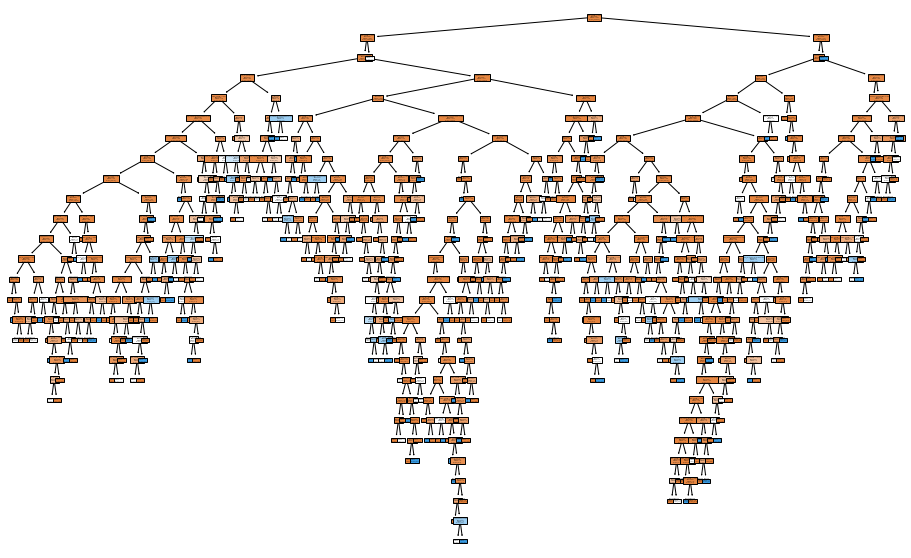

In [8]:
plt.figure(figsize=(16, 10))
plot_tree(clf, feature_names=X_train.columns, filled=True)
plt.show()

d) Produza uma visualização da matriz de classificação (ou matriz de confusão) coloque os rótulos como "aprovados" e "reprovados", pois afinal de contas, são essas as decisões que se podem tomar com propostas de crédito.

C:\Users\yanks\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


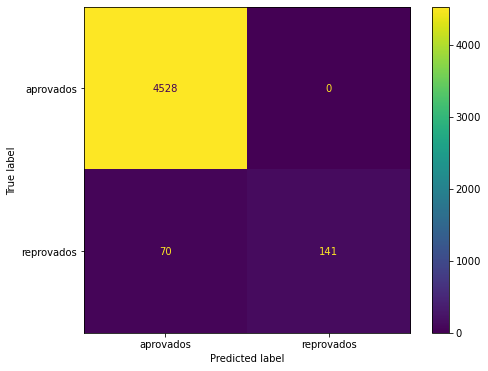

In [12]:
fig, ax = plt.subplots(figsize=(8, 6))  # Ajuste o tamanho da figura conforme necessário

plot_confusion_matrix(estimator=clf, 
                      X=X_train, 
                      y_true=y_train, 
                      display_labels=['aprovados', 'reprovados'],
                      ax=ax)

plt.show()

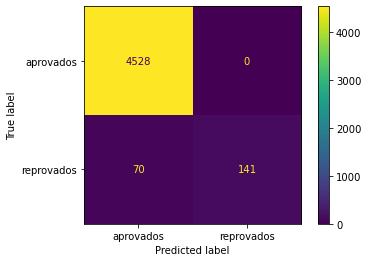

In [20]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_train, 
                                      y=y_train, 
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

e) Calcule a acurácia na base de treinamento.

In [21]:
print('Acurácia na base de treinamento:')
predict_train = clf.predict(X=X_train)
accuracy_score(y_true=y_train, 
               y_pred=predict_train)

Acurácia na base de treinamento:


0.9852289512555391

#### 3) Vamos avaliar o modelo na base de testes

a) Classifique a base de teste de acordo com a árvore que você treinou no item 2.

In [22]:
predict_test = clf.predict(X=X_test)

print('Valores preditos:') 
print(pd.Series(predict_test).value_counts(), '\n')

print('Valores reais:')
print(y_test.value_counts())

Valores preditos:
False    1933
True       98
dtype: int64 

Valores reais:
False    1944
True       87
Name: mau, dtype: int64


b) Produza a visualização da matriz de confusão para a base de teste.

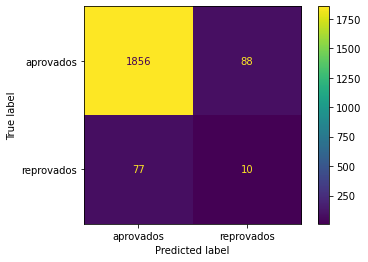

In [23]:
ConfusionMatrixDisplay.from_estimator(estimator=clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['aprovados', 'reprovados'])

plt.show()

c) Calcule a acurácia da base de teste. Compare com a acurácia da base de treinamento.

In [24]:
print('Acurácia da base de teste:', 
      accuracy_score(y_true=y_test, 
                     y_pred=predict_test), '\n')

print('Acurácia da base de treinamento:', 
      accuracy_score(y_true=y_train, 
                     y_pred=predict_train))

Acurácia da base de teste: 0.9187592319054653 

Acurácia da base de treinamento: 0.9852289512555391


d) Treine uma nova árvore com número mínimo de observações por folha de 5 e máximo de profundidade de 10. 
Use o random_state = 123. Avalie a matriz de classificação. 
Observe a distribuição da predição - qual a proporção de proponentes foram classificados como 'maus'?

In [26]:
nova_clf = DecisionTreeClassifier(max_depth=10, 
                                  min_samples_leaf=5, 
                                  random_state=123)
nova_clf = nova_clf.fit(X=X_train, 
                        y=y_train)

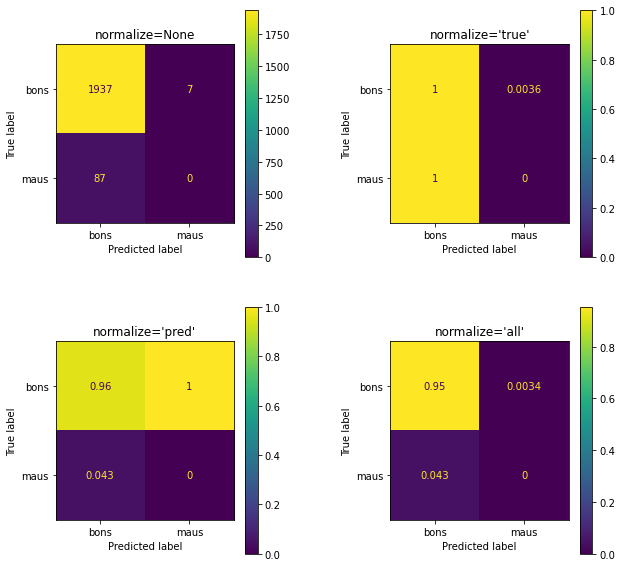

In [27]:
fig, axes = plt.subplots(nrows=2, 
                         ncols=2, 
                         figsize=(10,10))
fig.subplots_adjust(wspace=0.5)

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize=None, 
                                      ax=axes[0,0])
axes[0,0].set_title(label="normalize=None")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='true', 
                                      ax=axes[0,1])
axes[0,1].set_title(label="normalize='true'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='pred', 
                                      ax=axes[1,0])
axes[1,0].set_title(label="normalize='pred'")

ConfusionMatrixDisplay.from_estimator(estimator=nova_clf, 
                                      X=X_test, 
                                      y=y_test, 
                                      display_labels=['bons', 'maus'], 
                                      normalize='all', 
                                      ax=axes[1,1])
axes[1,1].set_title(label="normalize='all'")

plt.show()

In [28]:
print("Proporção de proponentes classificados como 'maus':",
      round(7/(1937+87+7)*100, 2), 
      '%')

Proporção de proponentes classificados como 'maus': 0.34 %


e) Como ficaria a acurácia se você classificasse todos os contratos como 'bons'?

In [29]:
print("Valores reais:")
print(pd.Series(y_test).value_counts(), 
      '\n')

print("Todos os contratos da base teste classificados como 'bons':")
print(pd.Series(y_test.replace(to_replace=True, 
                               value=False)
               ).value_counts(), 
      '\n')

print('Acurácia:', 
      round(accuracy_score(y_true=y_test, 
                           y_pred=y_test.replace(to_replace=True, 
                                                 value=False)
                          ) * 100,
            2), 
      '%')

Valores reais:
False    1944
True       87
Name: mau, dtype: int64 

Todos os contratos da base teste classificados como 'bons':
False    2031
Name: mau, dtype: int64 

Acurácia: 95.72 %
